В рамках домашнего задания решить следующие задачи:

1. Задача регрессии/классификации на простых данных (противоположная к той, что решалась ранее)

2. Задача кластеризации на простых данных

Задача регрессии

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [168]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Коэффициент детерминации (R²): 0.5758
Средняя квадратическая ошибка (MSE): 0.5559
Остаточная сумма квадратов (RSS): 2294.7205


/tmp/ipykernel_29403/369464380.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=30)


Text(0.5, 1.0, 'Реальное vs Предсказанное')

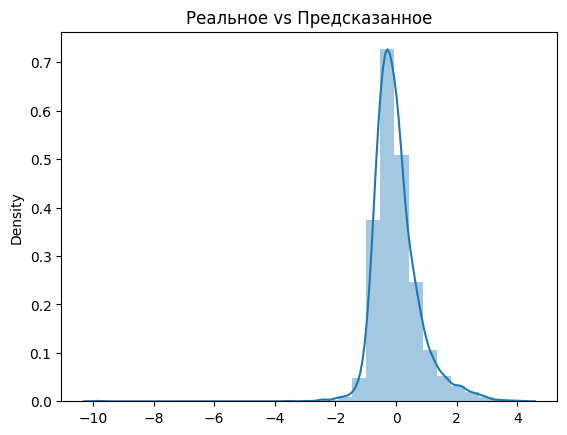

In [169]:
r2 = r2_score(y_test, y_pred)
print(f"Коэффициент детерминации (R²): {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Средняя квадратическая ошибка (MSE): {mse:.4f}")

rss = np.sum((y_test - y_pred) ** 2)
print(f"Остаточная сумма квадратов (RSS): {rss:.4f}")

sns.distplot((y_test-y_pred),bins=30)
plt.title('Реальное vs Предсказанное')

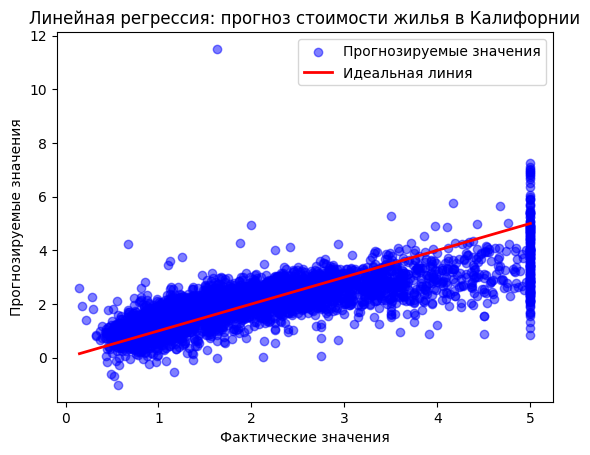

In [170]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Прогнозируемые значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Идеальная линия')
plt.xlabel('Фактические значения')
plt.ylabel('Прогнозируемые значения')
plt.title('Линейная регрессия: прогноз стоимости жилья в Калифорнии')
plt.legend()
plt.show()

Задача кластеризации

In [171]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd

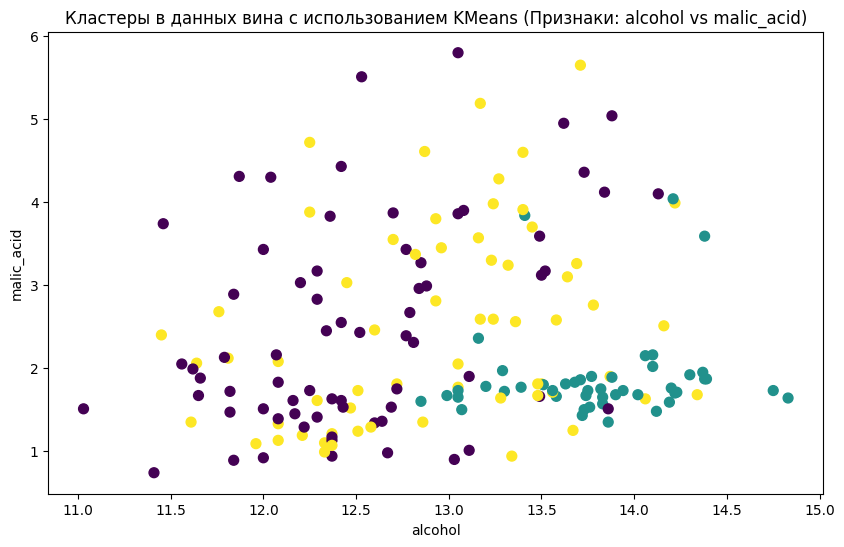

In [172]:
data = load_wine()

X = data.data
model = KMeans(n_clusters=3)
model.fit(X)

predicted_labels = model.predict(X)

x_axis = X[:, 0]  # alcohol 
y_axis = X[:, 1]  # malic_acid

plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_axis, c=predicted_labels, cmap='viridis', s=50)
plt.xlabel(data.feature_names[0])  # alcohol
plt.ylabel(data.feature_names[1])  # malic_acid
plt.title("Кластеры в данных вина с использованием KMeans (Признаки: alcohol vs malic_acid)")
plt.show()

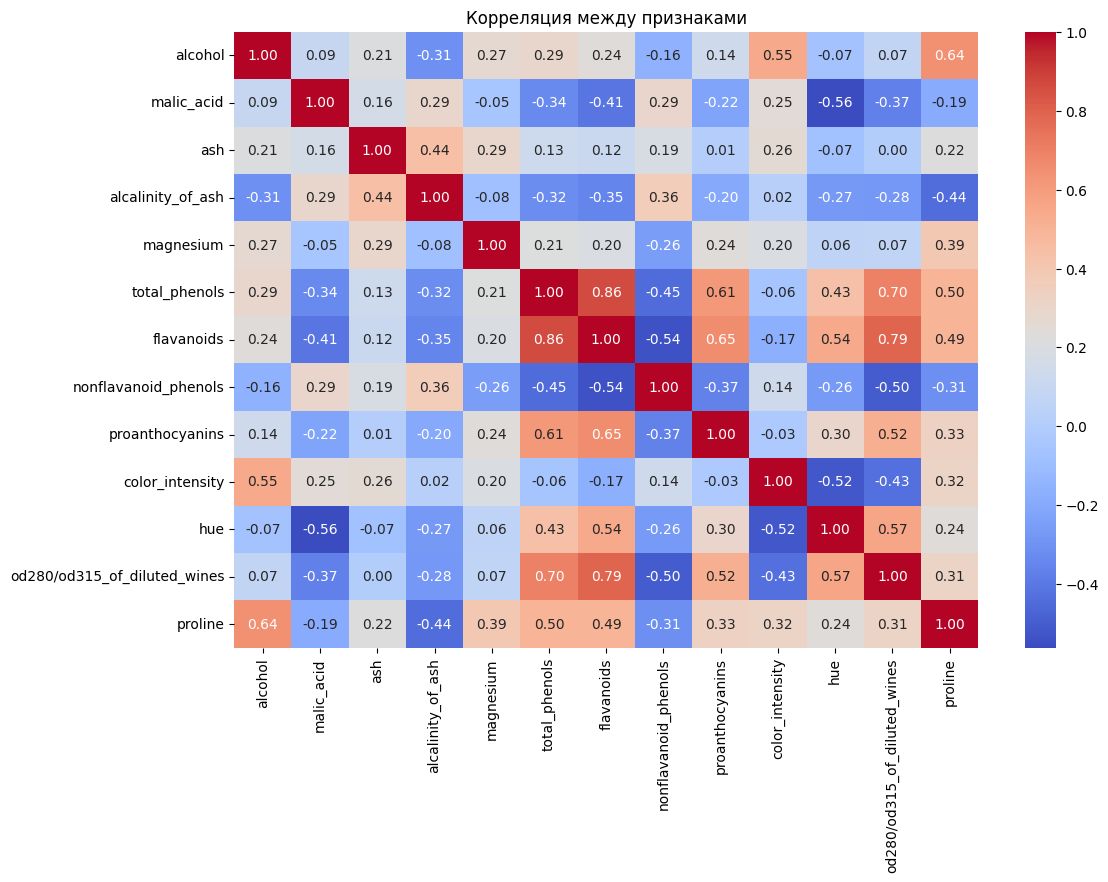

In [173]:
correlation_matrix = pd.DataFrame(data.data, columns=data.feature_names).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между признаками')
plt.show()

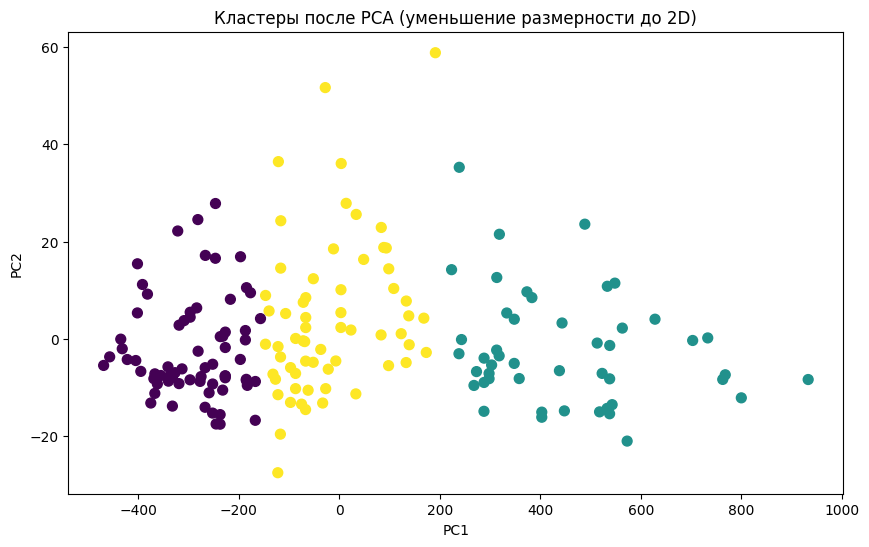

In [174]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis', s=50)
plt.title('Кластеры после PCA (уменьшение размерности до 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()